# 0. Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn

sys.path.append("../functions")

from Utils import *
from Plotting import *

import numpy as np
import random 

from Forward import simulate_with_params

%matplotlib inline


# 1. Read Data 

In [2]:
chance_level_subjects = [45634, 46069, 46279, 46303, 46651, 47398]
lv_induction_data = preprocess_data("../data/twoArmedandit_with_confidence.csv", chance_level_subjects, "induction", "hc")
subjects = lv_induction_data["sub"].unique()

forward_df = pd.read_csv("../results/forward_df.csv")
backward_df = pd.read_csv("../results/backward_df.csv")
backward_df_unscaled = pd.read_csv("../results/backward_df_unscaled.csv")
scaled_brier_df = pd.read_csv("../results/scaled_brier_df.csv")
human_lv_df = lv_induction_data.rename(columns={"sub": "subject"})

NameError: name 'preprocess_data' is not defined

# 2. Simulate In the Task 

In [ ]:
seed = 21

# Set the random seed
np.random.seed(seed)
random.seed(seed)

forward_simulation_df = simulate_with_params(forward_df, lv_induction_data, subjects, n= 100)
backward_simulation_df = simulate_with_params(backward_df, lv_induction_data, subjects, n= 100)
backward_unscaled_simulation_df = simulate_with_params(backward_df_unscaled, lv_induction_data, subjects, n= 100)

forward_simulation_df.rename(columns={"sub": "subject"}, inplace=True)
backward_simulation_df.rename(columns={"sub": "subject"}, inplace=True)
backward_unscaled_simulation_df.rename(columns={"sub": "subject"}, inplace=True)



In [ ]:
forward_simulation_df.to_csv("../results/forward_simulation_df.csv")
backward_simulation_df.to_csv("../results/backward_simulation_df.csv")
backward_unscaled_simulation_df.to_csv("../results/backward_simulation_unscaled_df.csv")

# 3. Figures 

## Figure 3 

In [4]:
forward_simulation_df = pd.read_csv("../results/forward_simulation_df.csv")
backward_simulation_df = pd.read_csv("../results/backward_simulation_df.csv")
backward_unscaled_simulation_df = pd.read_csv("../results/backward_simulation_unscaled_df.csv")


In [5]:
def calculate_averages(df):
    """
    Group by 'subject' and calculate the mean of 'reward', 'cor', and 'cj'. 
    """
    return df.groupby("subject").agg({"reward": "mean", "cor": "mean", "cj": "mean"}).reset_index()

dataframes = [forward_simulation_df, human_lv_df, backward_simulation_df, backward_unscaled_simulation_df]
averaged_dataframes = [calculate_averages(df) for df in dataframes]

groups = ["Forward", "Empirical", "Backward"]

avg_df = merge_result_df(averaged_dataframes, groups, 200, subjects)

# Rename columns in the merged DataFrame
avg_df.rename(columns={"reward": "mean_reward", "cor": "accuracy", "cj": "mean conf"}, inplace=True)

groups = ["Forward", "Backward"]

params_df =  merge_result_df(
    [forward_df, backward_df], groups, 200, subjects
)


Statistics for Empirical and Forward =7.0, p=2.407e-10
Statistics for Backward and Empirical =35.0, p=1.117e-09
Statistics for Forward and Backward =350.0, p=7.262e-04
mean Forward = 0.76
mean Empirical = 0.86
mean Backward = 0.71
Statistics for Empirical and Forward =443.0, p=9.916e-03
Statistics for Backward and Empirical =592.0, p=1.950e-01
Statistics for Forward and Backward =686.0, p=6.266e-01
mean Forward = 3.99
mean Empirical = 3.98
mean Backward = 3.99
mean for Negative LL (Forward - Backward) = -60.07672285176888
sd for Negative LL (Forward - Backward) = 112.26730412162264
mean for Confidence Distance (Forward - Backward) = 0.033978358233478244
sd for Confidence Distance (Forward - Backward) = 0.05572308626416334
Statistics for Forward and Backward =27.0, p=4.717e-08
mean Forward = 0.94
mean Backward = 0.66
Statistics for Forward and Backward =531.0, p=6.860e-02
mean Forward = 15.15
mean Backward = 23.98


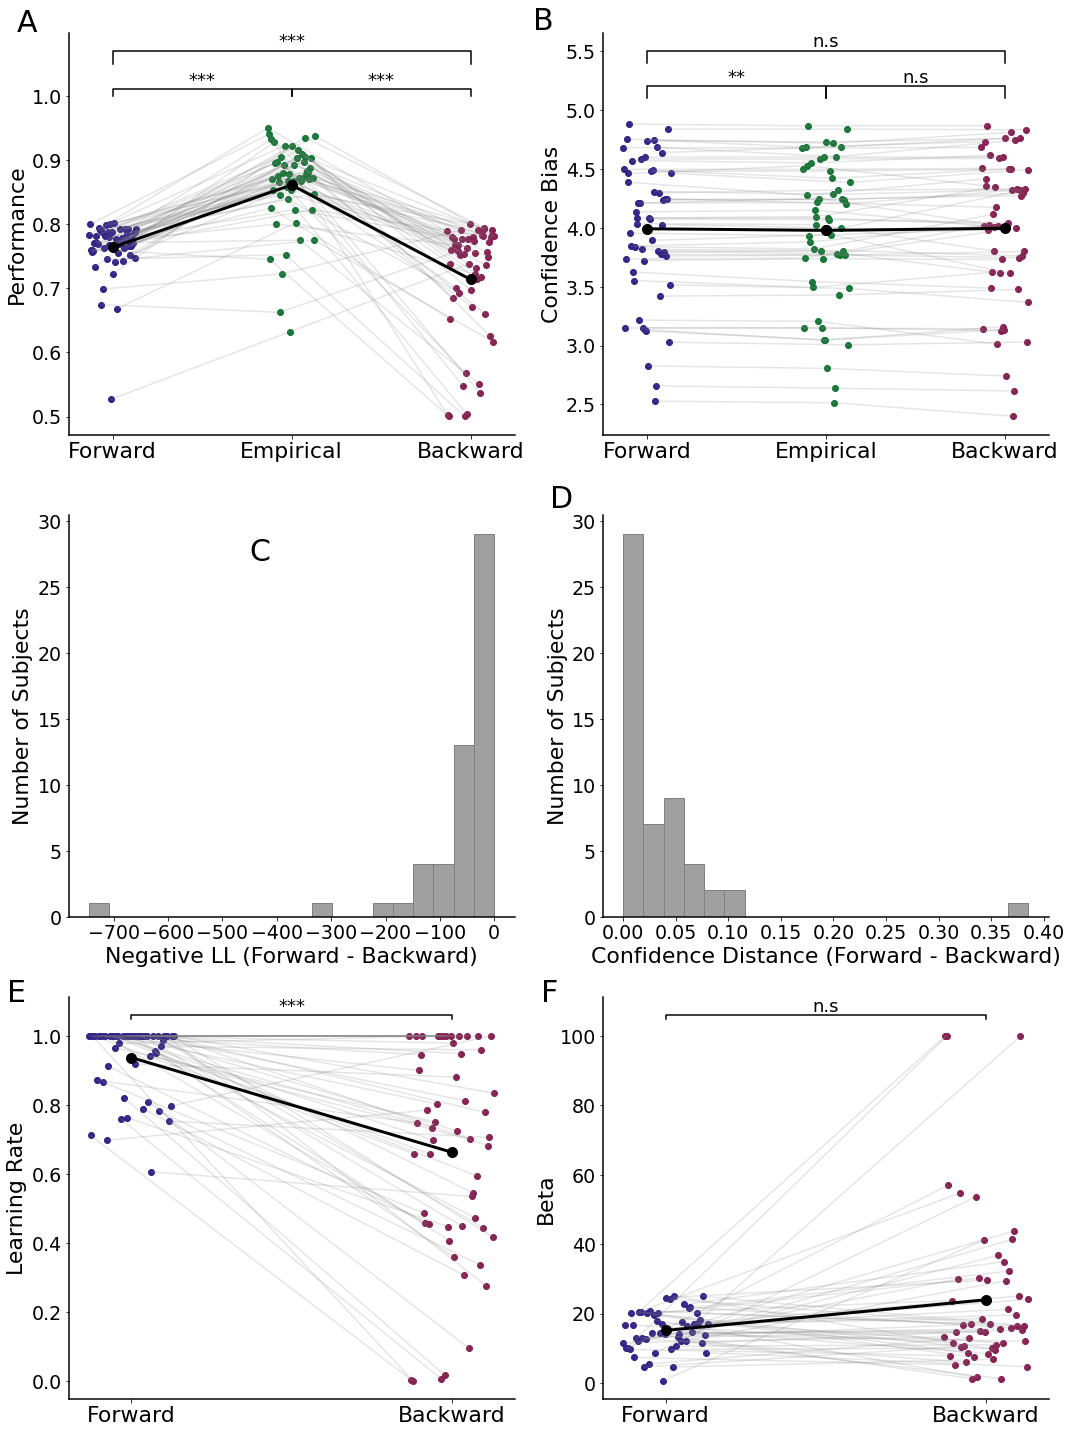

In [6]:
plt.figure(figsize=(15, 20))

plt.subplot(3,2,1)


groups = ["Forward", "Empirical", "Backward"]


comparison_plot(
    avg_df,
    "accuracy",
    groups,
    "",
    [["Empirical", "Forward"], ["Backward", "Empirical"], ["Forward", "Backward"]],
    [1, 1, 1.05],
    [0.01, 0.01, 0.02],
    y_label="Performance",
)

plt.text(-80, 1.1, "A", fontsize=30)


plt.subplot(3,2,2)

plt.text(-100, 5.68, "B", fontsize=30)

groups = ["Forward", "Empirical", "Backward"]

comparison_plot(
    avg_df,
    "mean conf",
    groups,
    "",
    [["Empirical", "Forward"], ["Backward", "Empirical"], ["Forward", "Backward"]],
    [5.1, 5.1, 5.4],
    [0.1, 0.1, 0.1],
    legend="lower right",
    y_label="Confidence Bias",
)

plt.subplot(3,2,3)

plt.text(-450, 27, "C", fontsize=30)

groups = ["Forward", "Backward"]

plot_histogtram(forward_df["LL"] - backward_df["LL"],
                "grey",
                "Negative LL (Forward - Backward)"
)

plt.subplot(3,2,4)

plt.text(-.07, 31, "D", fontsize=30)

plot_histogtram(forward_df["Confidence Distance"] - backward_df["Confidence Distance"],
                "grey",
                "Confidence Distance (Forward - Backward)"
               )


plt.subplot(3,2,5)

plt.text(-50, 1.1, "E", fontsize=30)

comparison_plot(
    params_df,
    "alpha",
    groups,
    "",
    [["Forward", "Backward"]],
    [1.05, 1.05],
    [0.01, 0.01],
    y_label="Learning Rate",
)

plt.subplot(3,2,6)

plt.text(-50, 110, "F", fontsize=30)

comparison_plot(
    params_df,
    "beta",
    groups,
    "",
    [["Forward", "Backward"]],
    [105, 105],
    [1, 1],
    y_label="Beta",
)



plt.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.savefig("../figs/fig3.png", dpi=400, bbox_inches = "tight")

## Figure 4

In [1]:
# Calculate QSR, empirical accuracy (emp_acc), and empirical confidence judgment (emp_cj) 
emp_metrics_df = lv_induction_data.groupby("sub").apply(lambda x: pd.Series({
    "QSR": group_qsr(x),
    "emp_acc": x["cor"].mean(),
    "emp_cj": x["cj"].mean()
})).reset_index().rename(columns={"sub": "subject"})

# Merge all necessary DataFrames together
backward_emp_df = averaged_dataframes[2].merge(emp_metrics_df, on="subject")\
                                .merge(scaled_brier_df[["subject", "scaled_QSR"]], on="subject")

# Correctly align 'forward_cor' with subjects in 'backward_emp_df'
# This assumes 'forward_avg_df' is indexed by 'subject'; if not, ensure it is or adjust as necessary
forward_cor_aligned = backward_emp_df["subject"].map(averaged_dataframes[0].set_index("subject")["cor"])

# do the same for the backward_unscaled
backward_usncaled_cor_aligned = backward_emp_df["subject"].map(averaged_dataframes[3].set_index("subject")["cor"])


# Add new columns for MetaRL calculations and confidence bias
backward_emp_df["forward_cor"] = forward_cor_aligned
backward_emp_df["backward_unscaled_cor"] = backward_usncaled_cor_aligned
backward_emp_df["MetaRL"] = backward_emp_df["cor"] / backward_emp_df["forward_cor"]
backward_emp_df["MetaRL_unscaled"] = backward_emp_df["backward_unscaled_cor"] / backward_emp_df["forward_cor"]

# Rename columns as needed
backward_emp_df = backward_emp_df.rename(columns={"cor": "backward_cor"})

# Ensure the DataFrame is correctly formatted
backward_emp_df = backward_emp_df[['subject', 'backward_cor', 'QSR', 'emp_acc', 'emp_cj', 'scaled_QSR', 'forward_cor', 'MetaRL', 'MetaRL_unscaled']]

backward_with_params = pd.merge(backward_emp_df, forward_df, on =["subject"])

NameError: name 'lv_induction_data' is not defined

(p = 8.84e-04, r = 0.44,ci = [0.19,0.63])
(p = 2.16e-02, r = 0.31,ci = [0.05,0.54])


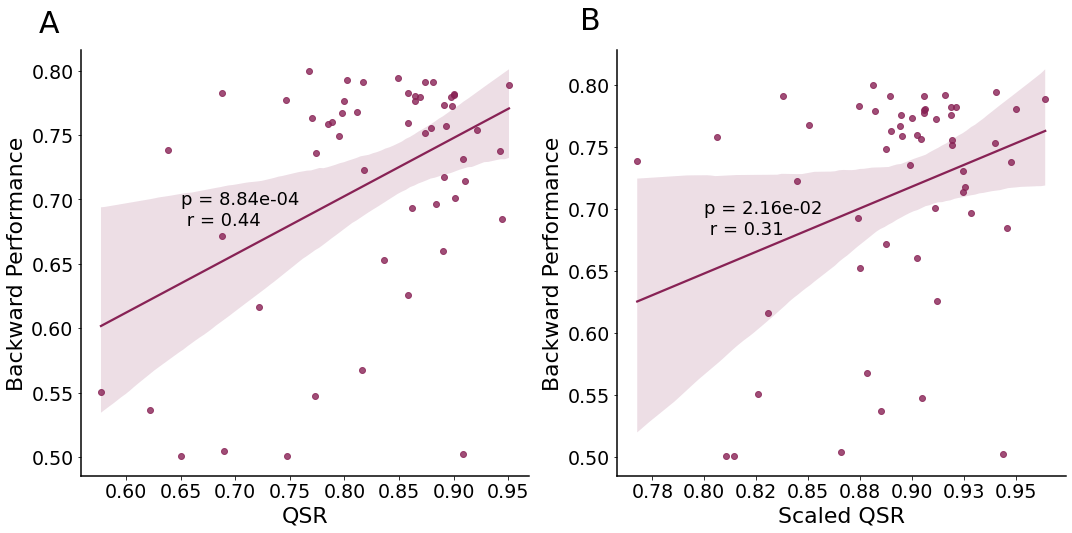

In [8]:
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(15, 7.5))

plt.subplot(1,2,1)

plot_regression_df(backward_emp_df, "QSR", "backward_cor", color_dict["Backward"] ,0.65, 0.68, "QSR", "Backward Performance")

plt.text(.52, .83, "A", fontsize=30)

plt.subplot(1,2,2)

plt.text(.74, .845, "B", fontsize=30)


plot_regression_df(backward_emp_df, "scaled_QSR", "backward_cor", color_dict["Backward"] ,0.8, 0.68, "Scaled QSR", "Backward Performance")

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.savefig("../figs/fig4.png", dpi=400, bbox_inches = "tight")


## Figure 5

(p = 2.04e-01, r = -0.18,ci = [-0.42,0.10])
(p = 7.59e-03, r = 0.36, ci = [0.10,0.57])
(p = 1.89e-01, r = 0.18,ci = [-0.09,0.43])
(p = 2.40e-01, r = -0.16,ci = [-0.41,0.11])


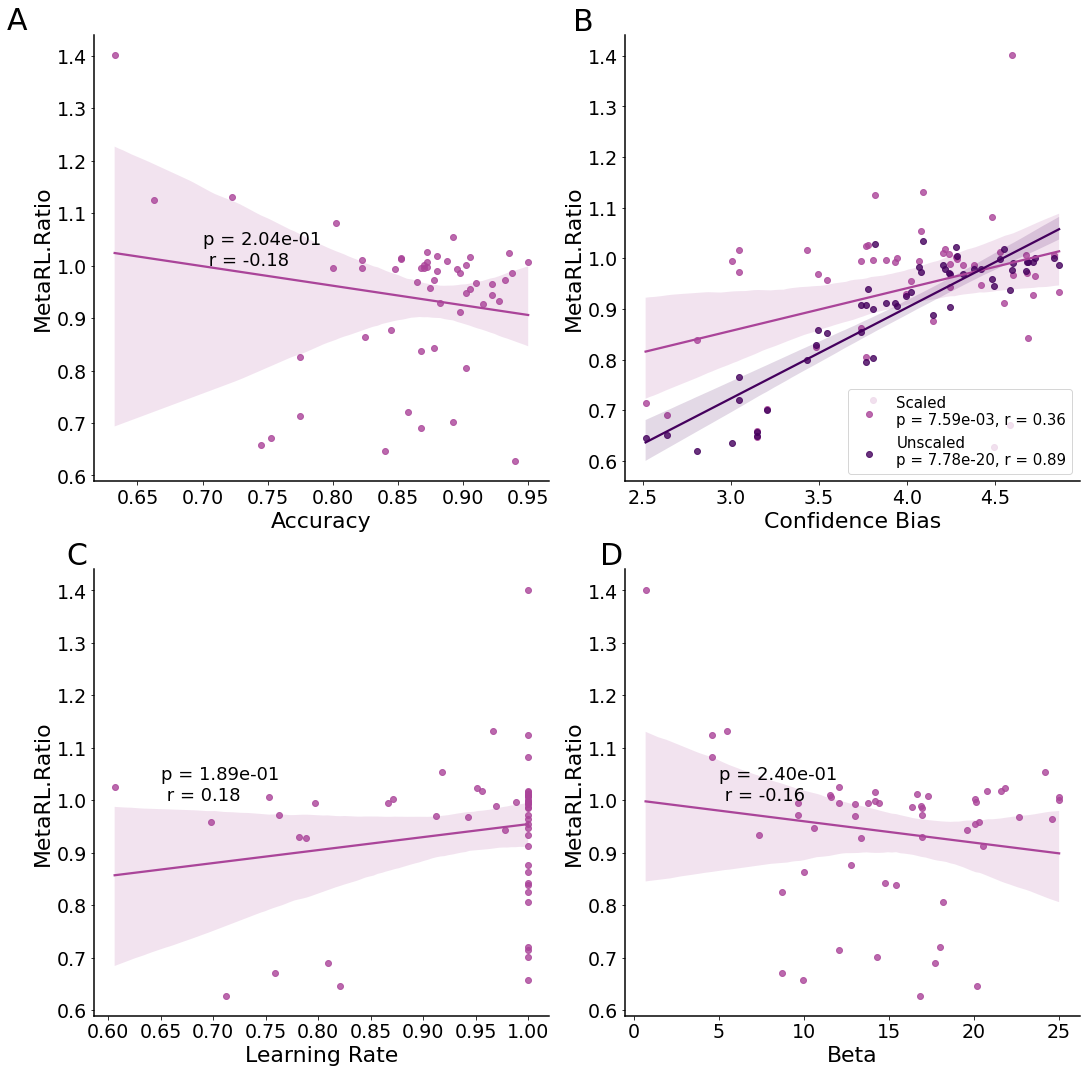

In [30]:
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)

plt.text(.55, 1.45, "A", fontsize=30)

plot_regression_df(backward_emp_df, "emp_acc", "MetaRL", "#AA4499",0.7, 1, "Accuracy", "MetaRL.Ratio")


plt.subplot(2,2,2)

plt.text(2.1, 1.45, "B", fontsize=30)

res = scipy.stats.pearsonr(backward_emp_df["emp_cj"], backward_emp_df["MetaRL"])

stat, pval= res 
r_low, r_high = res.confidence_interval(.95)
print("(p = {:.2e}, r = {:.2f}, ci = [{:.2f},{:.2f}])".format(pval, stat,r_low,r_high))

res2 = scipy.stats.pearsonr(backward_emp_df["emp_cj"], backward_emp_df["MetaRL_unscaled"])

stat2, pval2= res2 
r_low, r_high = res.confidence_interval(.95)



seaborn.regplot(data=backward_emp_df, x="emp_cj", y="MetaRL", color="#AA4499", label = "Scaled\np = {:.2e}, r = {:.2f}".format(pval, stat))

seaborn.regplot(data=backward_emp_df, x="emp_cj", y="MetaRL_unscaled", color="#44005D", label = "Unscaled\np = {:.2e}, r = {:.2f}".format(pval2, stat2))


plt.ylabel("MetaRL.Ratio", fontsize=22)
plt.xlabel("Confidence Bias", fontsize=22)

ax = plt.gca()
# hide x-axis
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(1.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=19)
plt.yticks(fontsize=19)

plt.legend(fontsize=15, loc = "lower right")


plt.subplot(2,2,3)

plt.text(.56, 1.45, "C", fontsize=30)

plot_regression_df(backward_with_params, "alpha", "MetaRL", "#AA4499",0.65, 1, "Learning Rate", "MetaRL.Ratio")

plt.subplot(2,2,4)

plt.text(-2, 1.45, "D", fontsize=30)

plot_regression_df(backward_with_params, "beta", "MetaRL", "#AA4499", 5, 1, "Beta", "MetaRL.Ratio")


plt.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.savefig("../figs/fig5.png", dpi=400, bbox_inches = "tight")



## Supp figure 5

(p = 1.13e-11, r = 0.77,ci = [0.63,0.86])
(p = 2.07e-02, r = 0.31,ci = [0.05,0.54])


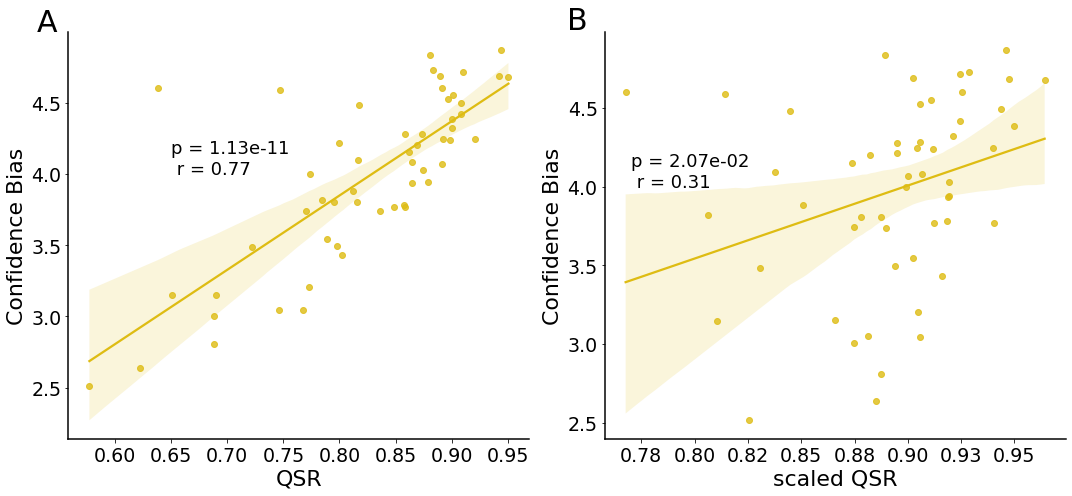

In [34]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)

plt.text(.53, 5, "A", fontsize=30)

plot_regression_df(backward_emp_df, "QSR", "emp_cj", "#DEBC13",0.65, 4, "QSR", "Confidence Bias")


plt.subplot(1,2,2)
plt.text(.74, 5, "B", fontsize=30)

plot_regression_df(backward_emp_df, "scaled_QSR", "emp_cj", "#DEBC13",0.77, 4, "scaled QSR", "Confidence Bias")

ax = plt.gca()

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


plt.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.savefig("../figs/supp_fig5.png", dpi=400, bbox_inches='tight')


## Supp figure 6

Statistics for Forward and Backward =368.0, p=2.404e-02
mean Forward = 2.35
mean Backward = 2.15
Statistics for Forward and Backward =352.0, p=7.730e-04
mean Forward = 4.26
mean Backward = 4.51


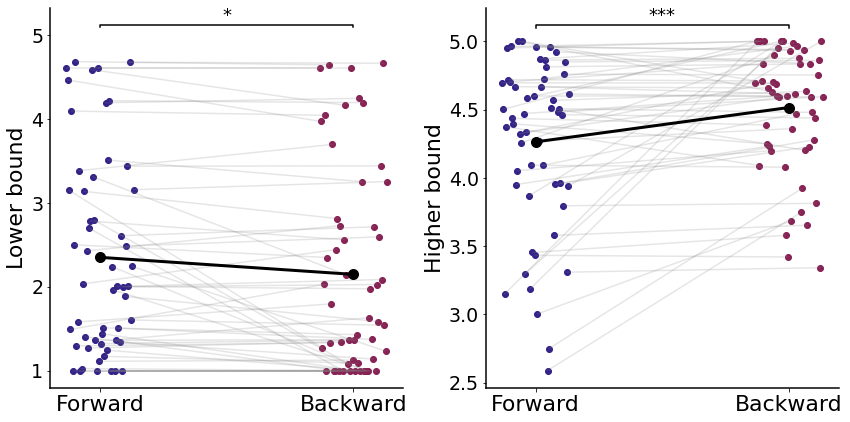

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
comparison_plot(
    params_df,
    "lbound",
    groups,
    "",
    [["Forward", "Backward"]],
    [5.1],
    [0.02],
    y_label="Lower bound",
)
plt.subplot(1, 2, 2)
comparison_plot(
    params_df,
    "hbound",
    groups,
    "",
    [["Forward", "Backward"]],
    [5.1],
    [0.02],
    y_label="Higher bound",
)
plt.tight_layout()

plt.savefig("../figs/supp_fig6.png", dpi=400, bbox_inches = "tight")
